In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ATHAK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# ---- Load Amazon Sample Dataset ---- #
df = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None, names=['text', 'label'])

In [4]:
# ---- Cleaning Function ---- #
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [5]:
# ---- Apply Cleaning ---- #
df['clean_text'] = df['text'].apply(clean_text)

In [6]:
# ---- Show Samples ---- #
print("Sample cleaned data:")
print(df[['text', 'clean_text', 'label']].head())


Sample cleaned data:
                                                text  \
0  So there is no way for me to plug it in here i...   
1                        Good case, Excellent value.   
2                             Great for the jawbone.   
3  Tied to charger for conversations lasting more...   
4                                  The mic is great.   

                                          clean_text  label  
0                    way plug us unless go converter      0  
1                          good case excellent value      1  
2                                      great jawbone      1  
3  tied charger conversations lasting minutesmajo...      0  
4                                          mic great      1  


In [7]:
# ---- Save Cleaned Dataset ---- #
df[['clean_text', 'label']].to_csv("cleaned_amazon.csv", index=False)

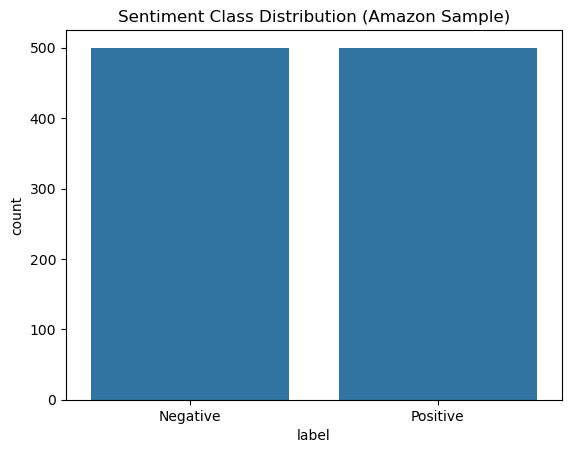

In [8]:
# ---- Class Distribution ---- #
sns.countplot(data=df, x='label')
plt.title("Sentiment Class Distribution (Amazon Sample)")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [9]:
# ---- Word Clouds ---- #
neg_text = ' '.join(df[df['label'] == 0]['clean_text'])
pos_text = ' '.join(df[df['label'] == 1]['clean_text'])

In [10]:
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neg_text)
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_text)

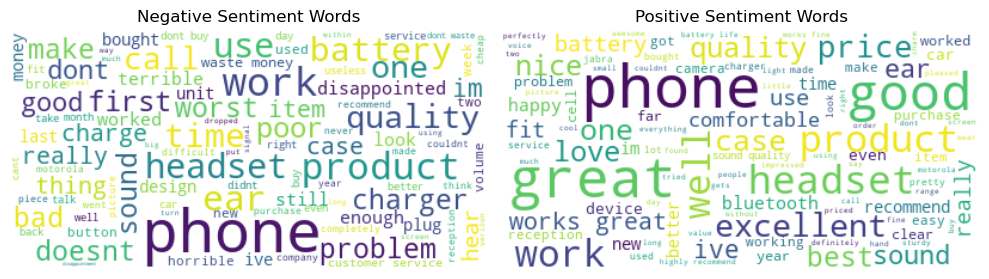

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.tight_layout()
plt.show()